In [29]:
import numpy as np
import matplotlib.pyplot as plt

from astroML.datasets import generate_mu_z
from astroML.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression

from sklearn.model_selection import GridSearchCV

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

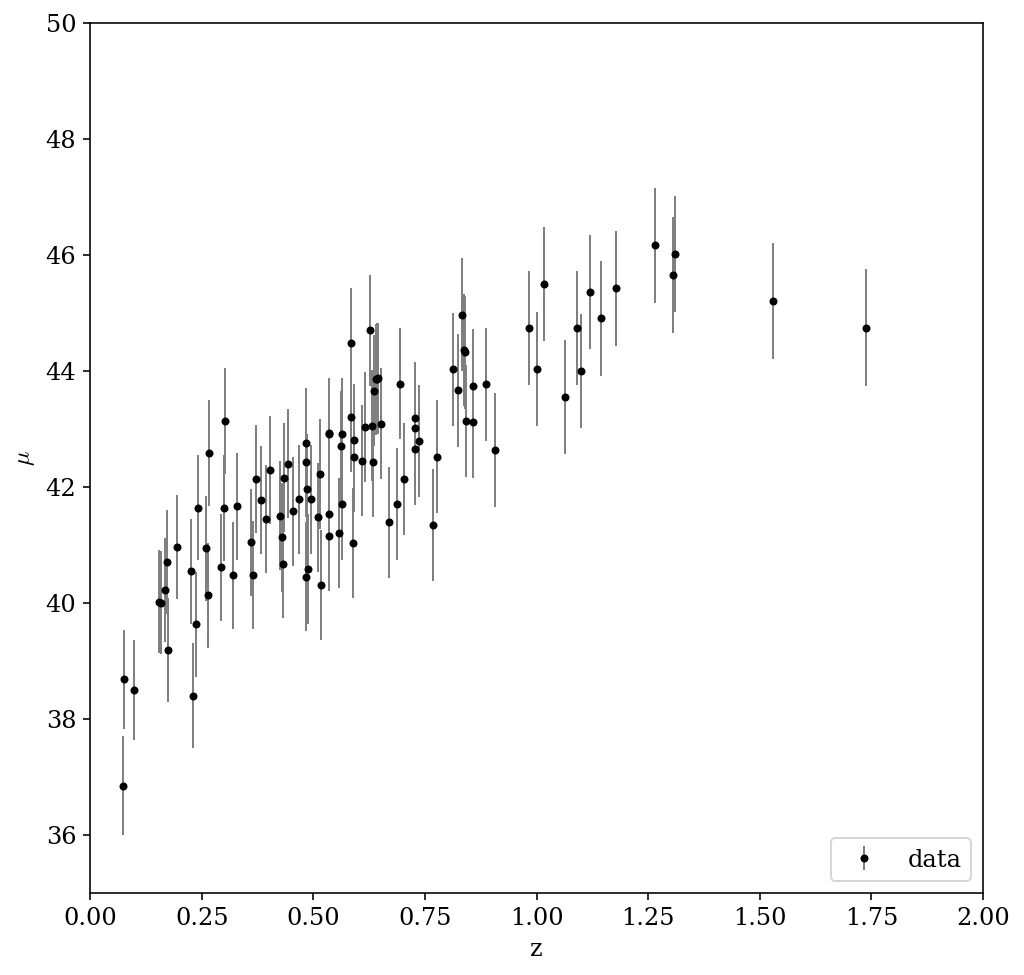

In [3]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

plt.show()

In [8]:
z_sk = z_sample[:, np.newaxis]

### linear regression

In [9]:
linear_model = LinearRegression()
linear_model.fit(z_sk, mu_sample, dmu)

LinearRegression()

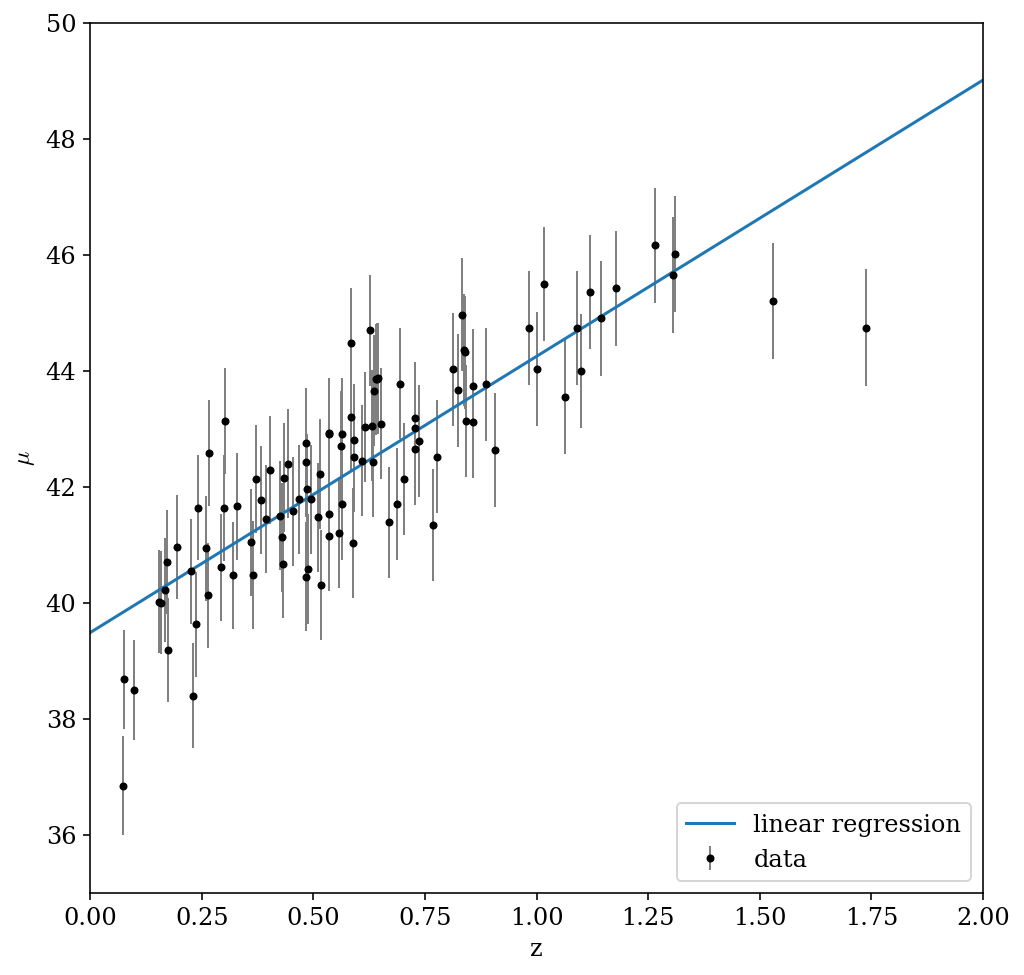

In [19]:
z_grid = np.linspace(0,2,100)[:, None]
mu_linear = linear_model.predict(z_grid)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(z_grid, mu_linear,label='linear regression')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

plt.show()

### polynomial regression

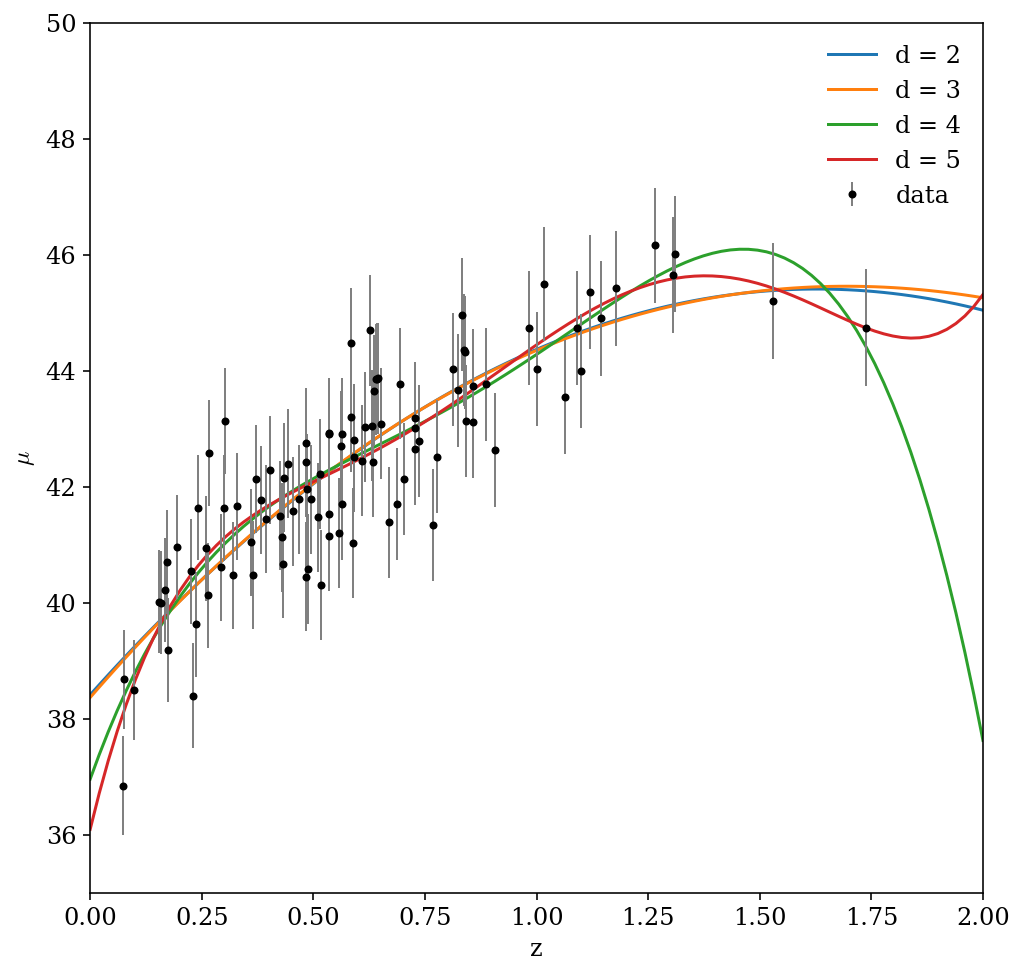

In [28]:
degrees = np.arange(2, 6)

for d in degrees:
    poly_model = PolynomialRegression(d)
    poly_model.fit(z_sk, mu_sample, dmu)
    mu_poly = poly_model.predict(z_grid)
    
    plt.plot(z_grid, mu_poly, label='d = %i' % d)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0,2)
plt.ylim(35,50)
plt.legend(frameon = False)
plt.show()

d = 1 == underfitting  
d = 5 == overfitting

### Cross validation 

In [32]:
K = 5 # Do 5-fold cross validation
grid = GridSearchCV(PolynomialRegression, {'degree': degrees}, cv= K) # Try each bandwidth with K-folds
grid.fit(z_sk)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <class 'astroML.linear_model.linear_regression.PolynomialRegression'> does not.